In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train,_),(x_test,_)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
nPixel = x_train.shape[1]*x_train.shape[2]

In [6]:
nPixel

784

In [7]:
x_train = x_train.reshape(x_train.shape[0],nPixel).astype('float32')
x_test = x_test.reshape(x_test.shape[0],nPixel).astype('float32')


In [8]:
x_train.shape

(60000, 784)

In [9]:
x_train = x_train/255
x_test = x_test/255


In [10]:
x_test.shape

(10000, 784)

Build the Autoencoder

In [11]:
input_size = 784
hidden_size = 128
code_size = 32


In [12]:
input_img = Input(shape=(input_size,))

hidden1= Dense(hidden_size,activation='relu')(input_img)
code= Dense(code_size,activation='relu')(hidden1)
hidden2 = Dense(hidden_size,activation='relu')(code)

output_img = Dense(input_size,activation='sigmoid')(hidden2)


Compile and Train the Model

In [13]:
autoencoder = Model(input_img,output_img)

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1416
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1021
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0960
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0930
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0911


In [16]:
decoded_img = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


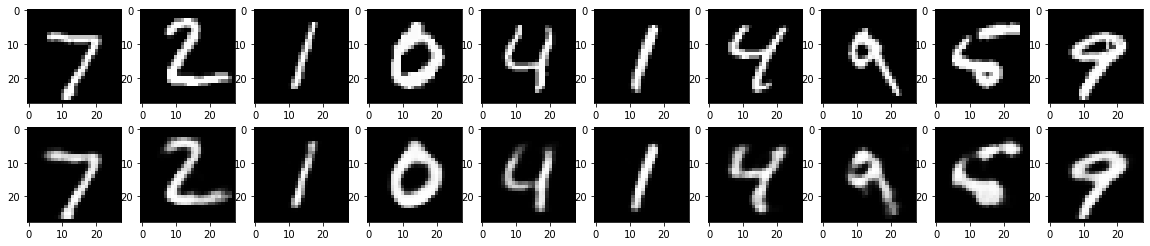

In [17]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #original image
  ax =plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  #Reconstructed image
  ax =plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()


Denoising Autoencoder

In [18]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor* np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor* np.random.normal(size=x_test.shape)


In [19]:
x_train_noisy=np.clip(x_train_noisy,0,1)
x_test_noisy=np.clip(x_test_noisy,0,1)

In [20]:
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1168
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1108
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1093
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1083
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1076
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1069
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1064
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1059
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1055
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1051


In [21]:
new_decoded_img = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


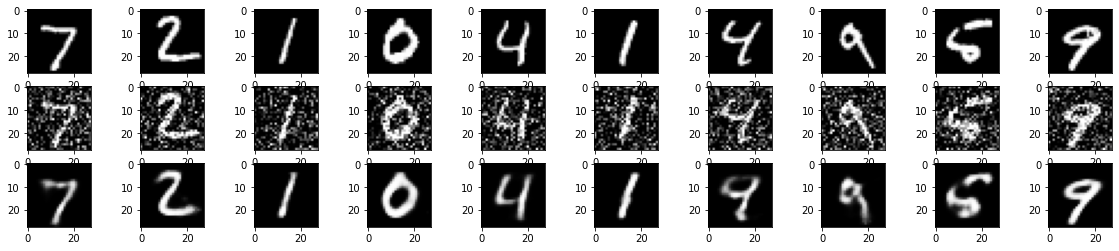

In [22]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #original image
  ax =plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  #noisy image
  ax =plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  #Reconstructed image
  ax =plt.subplot(3,n,i+1+2*n)
  plt.imshow(new_decoded_img[i].reshape(28,28))
  plt.gray()

